In [3]:
%load_ext autoreload
%autoreload 2

import os
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import sys

sys.path.append("..")
from visualization_functions import plot_attention, heatmap_overlay, VisType

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# replace with the path to the codecharts raw images
IMAGES_FOLDER = "../codecharts_data/raw_img"
# replace with the path to the predictions or ground-truth data you want to plot
DATA_FOLDER = "../mdsem_preds"
# replace with the times you want to plot (in ms)
DURATIONS = [500, 3000, 5000]

imnames = sorted(os.listdir(os.path.join(DATA_FOLDER, str(DURATIONS[0]))))
print("Found {} images".format(len(imnames)))

Found 1000 images


In [6]:
def load_img_color(impath): 
    im = cv2.imread(impath)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def load_img_grayscale(impath): 
    return cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

## Demo different heatmap styles

In [7]:
image_to_use = imnames[0]
raw_img_path = os.path.join(IMAGES_FOLDER, image_to_use)
heatmap_path = os.path.join(DATA_FOLDER, str(DURATIONS[0]), imnames[0])

print(raw_img_path, heatmap_path)

../codecharts_data/raw_img/CAT2000Actions_001.jpg ../mdsem_preds/500/CAT2000Actions_001.jpg


In [8]:
im = load_img_color(raw_img_path)
h, w, c = im.shape
heatmap_im = load_img_grayscale(heatmap_path)
resized_hm_im = cv2.resize(heatmap_im, (w,h))
im.shape, resized_hm_im.shape

((1340, 1786, 3), (1340, 1786))

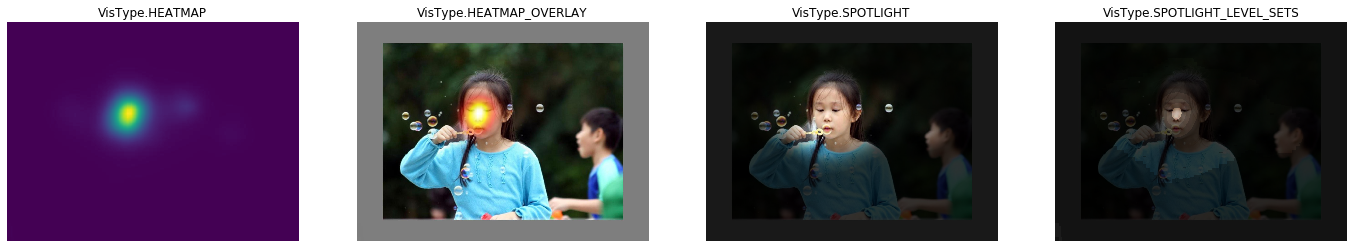

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(24, 8))

for i, vistype in enumerate(VisType):
    plot_attention(heatmap_path, im, resized_hm_im, ax=ax[i], plottype=vistype, title=vistype)
plt.plot()
pass

## Visualize predictions

In [10]:
ims_to_visualize = imnames[:10]
# Which visualization type to use 
vistype = VisType.SPOTLIGHT
# Do you want to plot the outputs? 
PLOT_PREDS = True
# Do you want to save the outputs?
SAVE_PRED_FIGS = False
# Where?
VIS_SAVEPATH = "mdsem_preds_visualized"

print("Processing {} images".format(len(ims_to_visualize)))
if PLOT_PREDS: print("Plotting predictions")
if SAVE_PRED_FIGS: print("Saving predictions to {}".format(VIS_SAVEPATH))

Processing 10 images
Plotting predictions


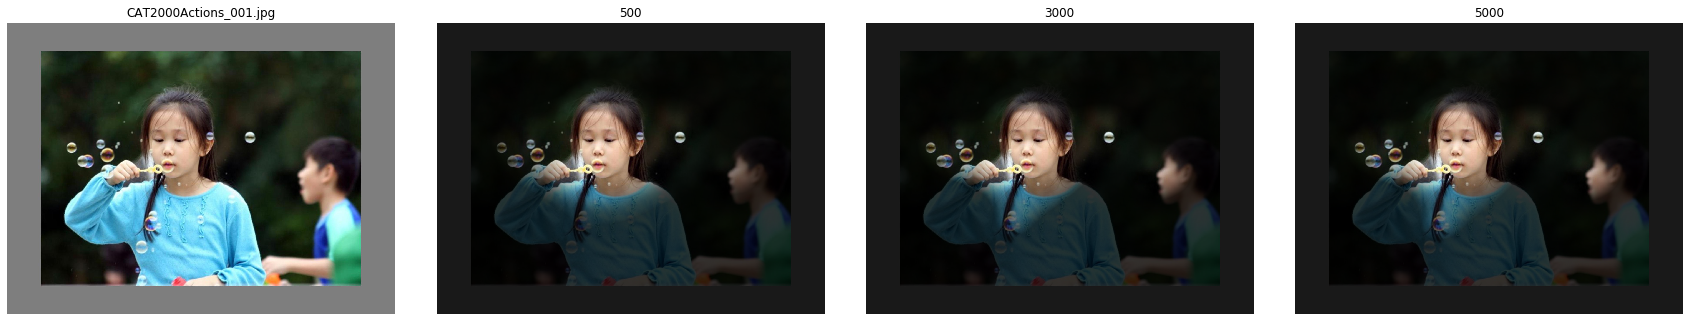

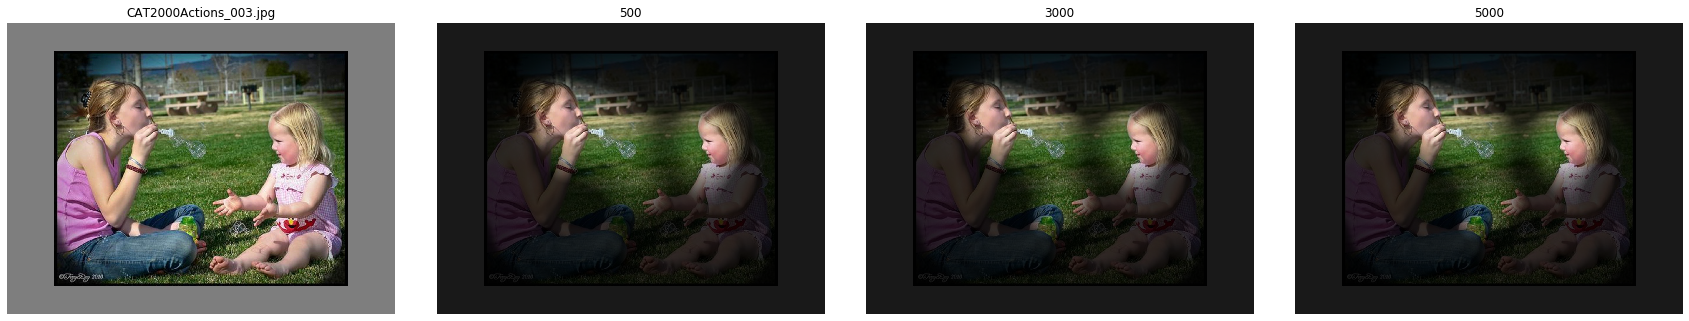

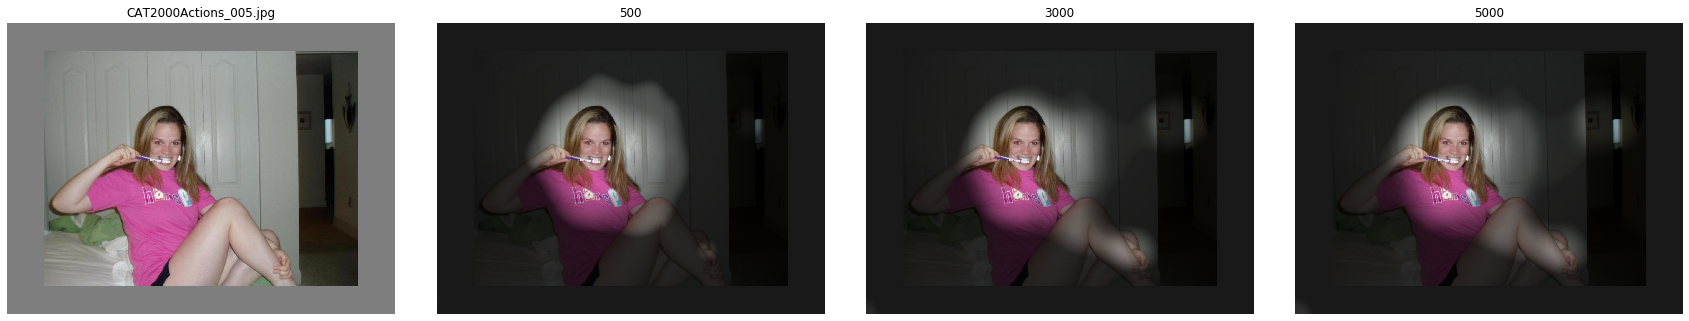

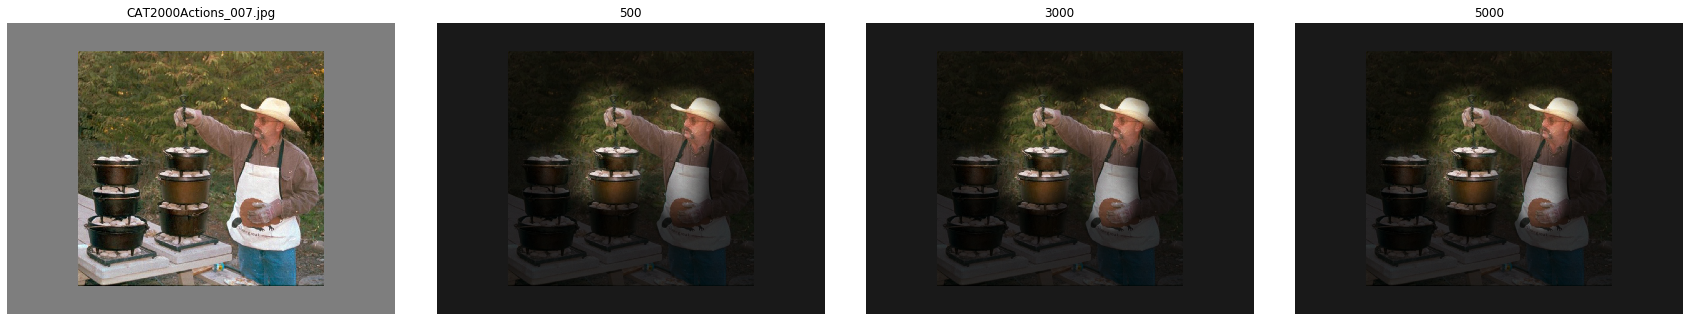

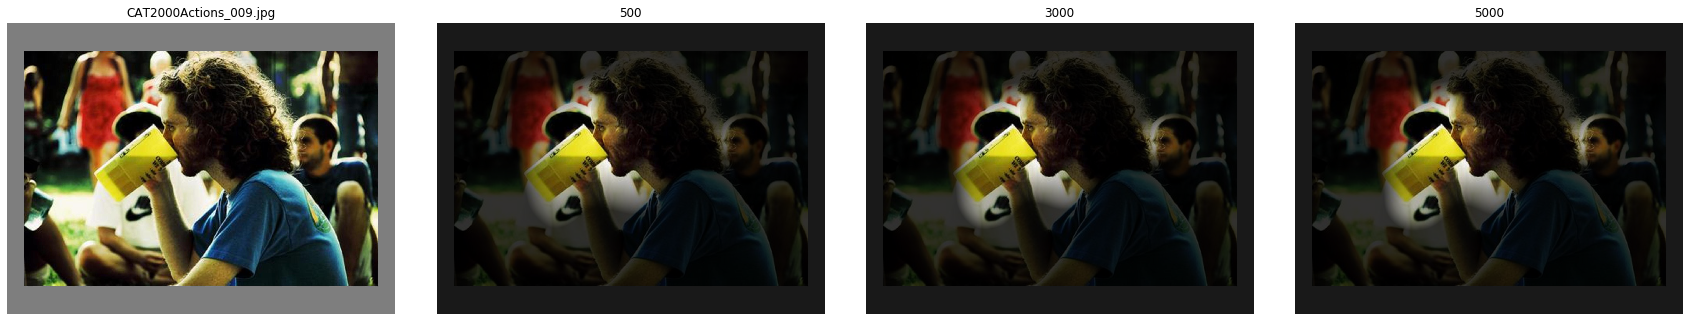

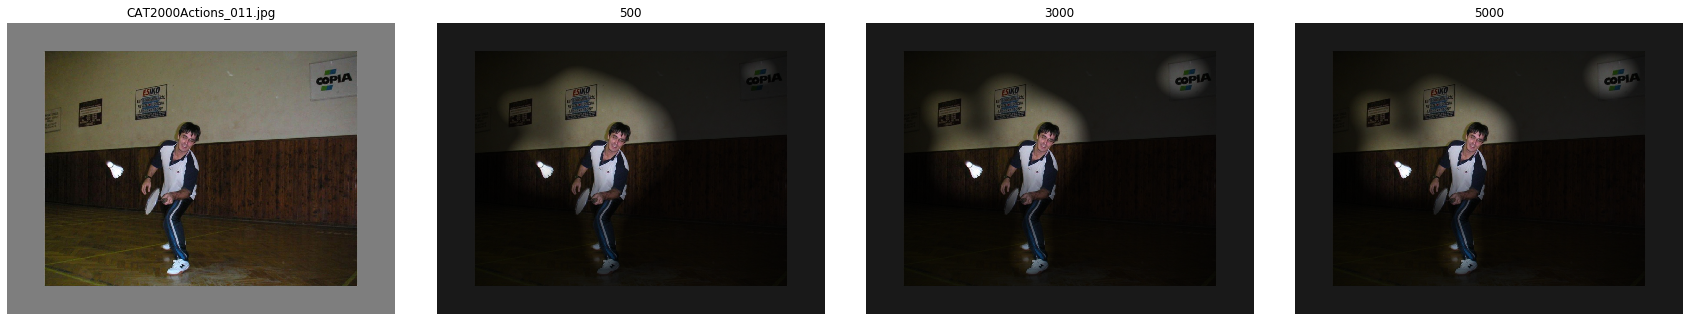

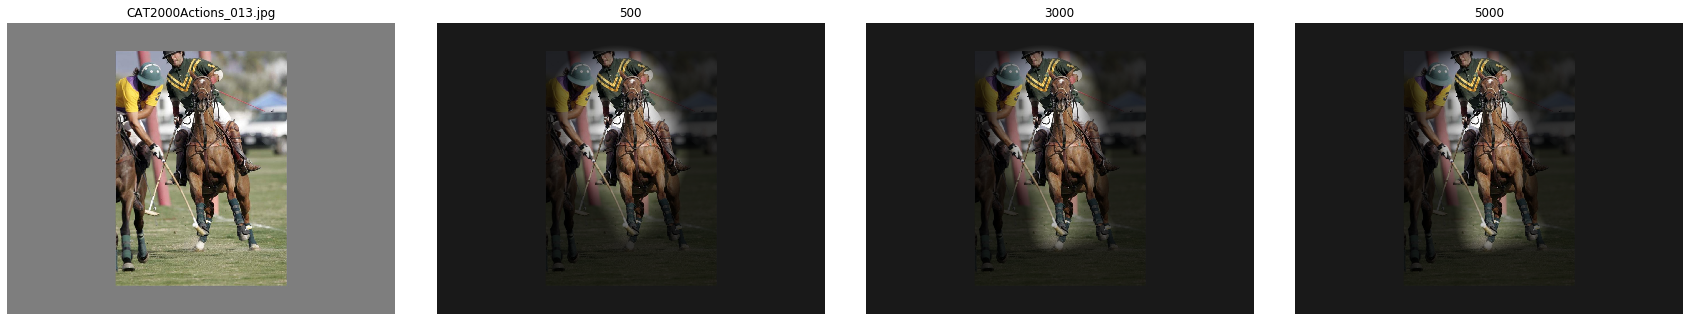

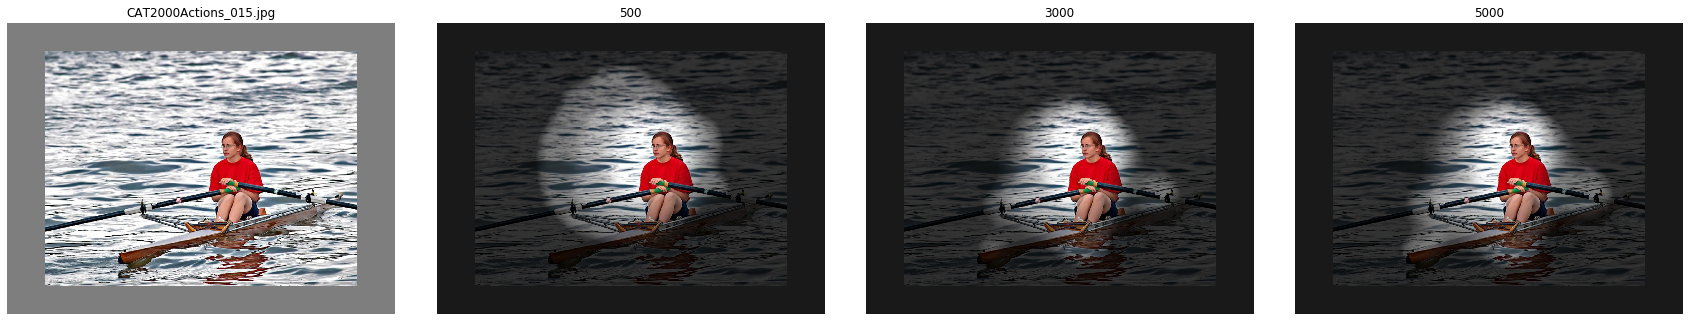

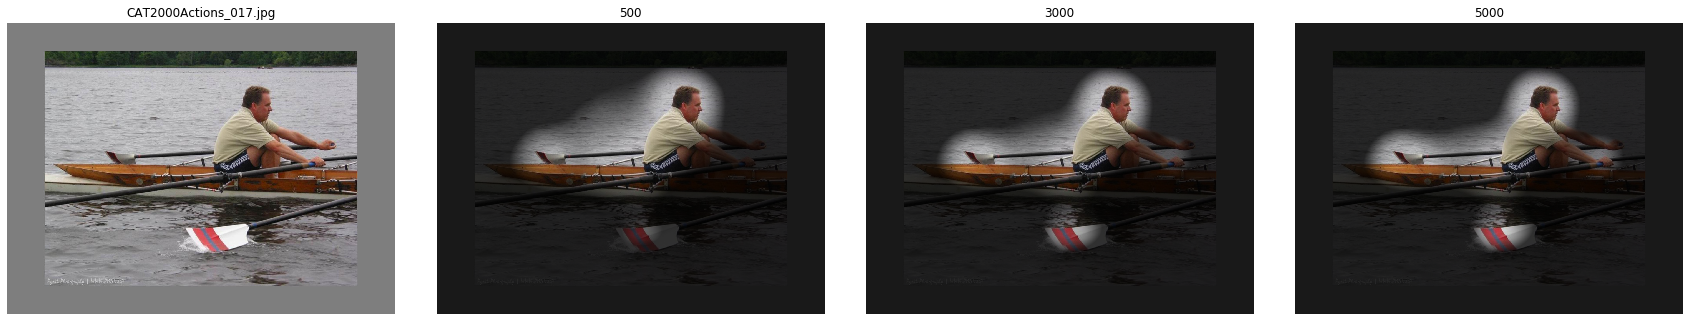

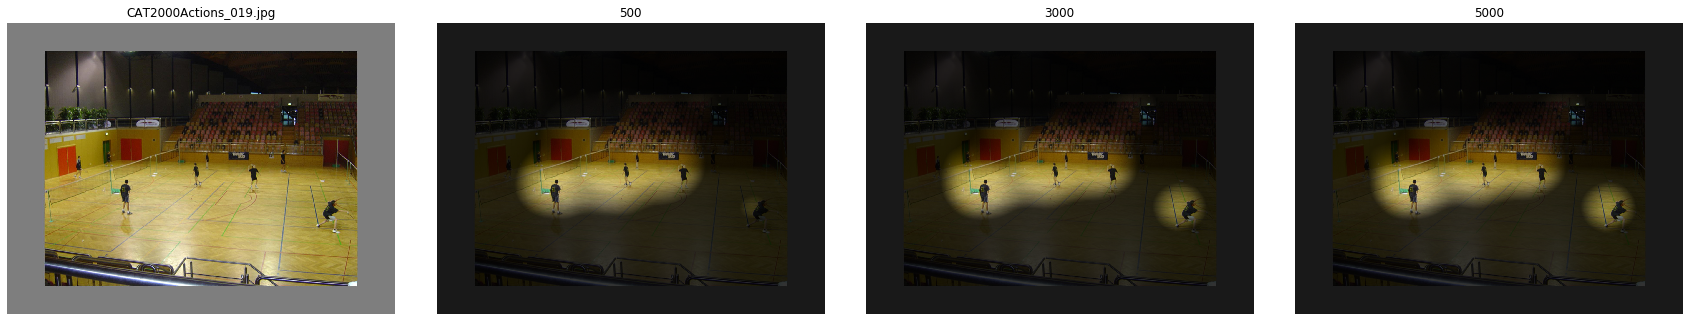

In [11]:
for imname in tqdm(ims_to_visualize): 
    fig, ax = plt.subplots(1, len(DURATIONS)+1, figsize=(24, 8))
    fig.tight_layout()
    raw_img_path = os.path.join(IMAGES_FOLDER, imname)
    im = load_img_color(raw_img_path)
    h, w, c = im.shape
    ax[0].imshow(im)
    ax[0].set_title(imname)
    ax[0].set_axis_off()
    
    for i, d in enumerate(DURATIONS): 
        heatmap_path = os.path.join(DATA_FOLDER, str(d), imname)
        heatmap_im = load_img_grayscale(heatmap_path)
        resized_hm_im = cv2.resize(heatmap_im, (w,h))
        plot_attention(heatmap_path, im, resized_hm_im, ax=ax[i+1], plottype=vistype, title=d)
    if PLOT_PREDS:
        plt.show()
    if SAVE_PRED_FIGS: 
        savepath = os.path.join(VIS_SAVEPATH, os.path.splitext(imname)[0]+".png")
        plt.savefig(savepath)
    fig.clf()